In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install chaospy
import numpy
import chaospy as ch
from matplotlib import pyplot

     |████████████████████████████████| 10.3 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 33.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 78.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 96.3 MB/s eta 0:00:01


ImportError: cannot import name 'hist' from 'matplotlib' (/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/__init__.py)

In [234]:
class liftComp(): 
    def __init__(self,Cl,A,rho):
        self.CL = Cl
        self.A = A
        self.rho = rho
    def compute(self,v):
        return .5 * self.CL * self.A * self.rho * v**2
    
class liftComp2(): 
    def __init__(self,Cl,A,v):
        self.CL = Cl
        self.A = A
        self.v = v
    def compute(self,rho):
        return .5 * self.CL * self.A * rho * self.v**2


In [287]:
distr1 = ch.Normal(5,1)
distr2 = ch.Normal(1.2,0.1)
distr  = distr2

In [288]:
samples = distr.sample(1e4)
obs = [lift.compute(i) for i in samples]

E 0.870826472331022
sd 0.145444128241012


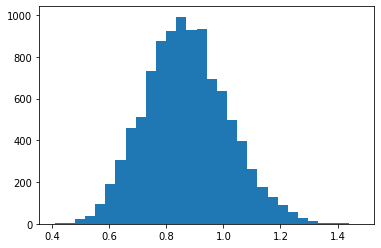

In [289]:
pyplot.hist(obs,bins=30)
print("E " + str(numpy.mean(obs)))
print("sd "+ str(numpy.std(obs)))

In [290]:
class quadrature():
    def __init__(self,distr):
        self.distr = distr 
    def makeQuadrature(self,order, rule="G", growth=False):
        self.rule = rule
        self.order = order
        self.growth =growth
        if isinstance(order, list):
            self.quadrature = [ch.generate_quadrature(ord, self.distr, rule=rule,growth= growth) for ord in order]
        else:
            self.quadrature = ch.generate_quadrature(order, self.distr, rule=rule,growth= growth)
    def plot(self):
        pyplot.title(self.rule + " Growth " + str(self.growth))
        if len(self.order)>1:
            p= [pyplot.scatter(quad[0],[ordi] *quad[0].size,s=quad[1]*1e3) for ordi,quad in zip(self.order, self.quadrature)]
        else:
            p = pyplot.scatter(self.quadrature[0],[self.order]*self.quadrature[0].size,s=self.quadrature[1]*1e3)
        return p
    def observe(self, model):
        obs = []
        for nodes in self.quadrature:
            obs.append([model(node) for node in nodes[0]])
        self.observations = obs

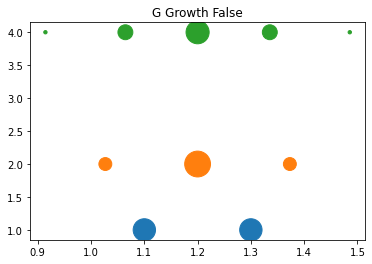

In [291]:
quadGauss = quadrature(distr)
quadGauss.makeQuadrature([1,2,4])
quadGauss.plot()

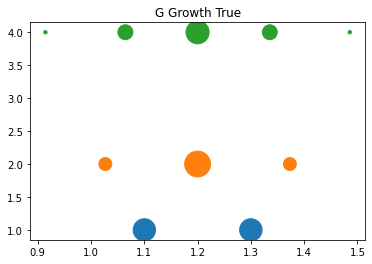

In [292]:
quadGaussGrowth = quadrature(distr)
quadGaussGrowth.makeQuadrature([1,2,4],growth=True)
quadGaussGrowth.plot()

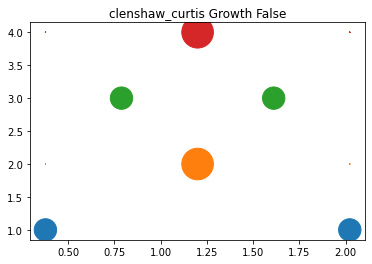

In [293]:
quadClen = quadrature(distr)
quadClen.makeQuadrature([1,2,3,4],rule = "clenshaw_curtis",growth=False)
quadClen.plot()

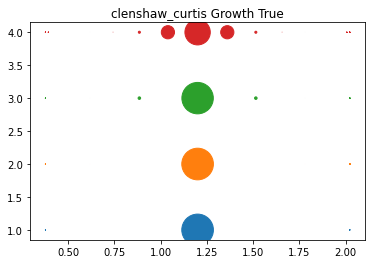

In [294]:
quadClenGrowth = quadrature(distr)
quadClenGrowth.makeQuadrature([1,2,3,4],rule = "clenshaw_curtis",growth=True)
quadClenGrowth.plot()

In [295]:
expansion = ch.generate_expansion(2, distr)
expansion.round(2)

polynomial([1.0, q0-1.2, q0**2-2.4*q0+1.43])

In [296]:
quadGauss.observe(lift.compute)
quadClen.observe(lift.compute)

In [297]:
order = 2
mod= ch.fit_quadrature(expansion,quadGauss.quadrature[order][0] , quadGauss.quadrature[order][1], quadGauss.observations[order][0])
print(mod.round(2))

0.6*q0**2


In [298]:
mod2 =ch.fit_quadrature(expansion,quadClen.quadrature[order][0] , quadClen.quadrature[order][1], quadClen.observations[order][0])
print(mod2.round(2))

6.07*q0**2-13.14*q0+7.92


In [303]:
print(ch.E(mod, distr))
print(ch.Std(mod, distr))

0.87
0.1442497833620551


In [304]:
print(ch.E(mod2, distr))
print(ch.Std(mod2, distr))

0.9653526000003732
0.16767740178023294
